# [2.X코드반영] Lab 12-0: rnn basics

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

print(tf.__version__)

2.4.1


## 데이터셋 준비

In [2]:
# hello 의 각 단어 원핫 인코딩
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,0,0]
o = [0,0,0,1]

## One cell: 4 (input_dim) in 2 (hidden_size)

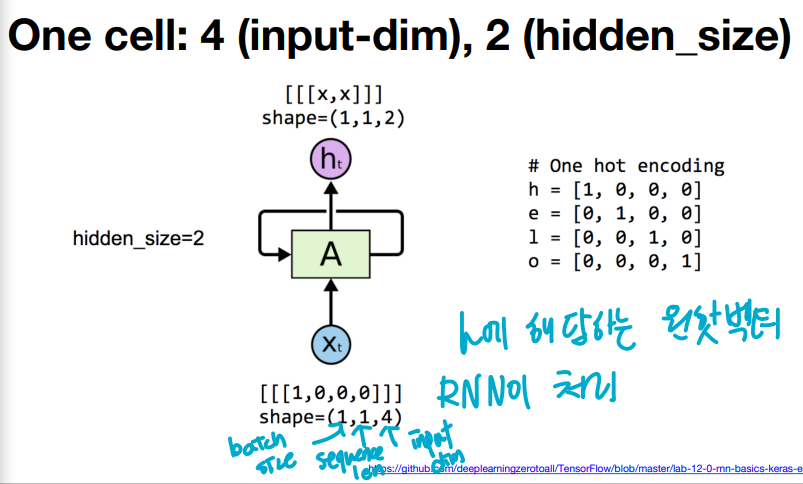

In [4]:
# One cell RNN input_dim:4 => output_dim:2

# 시퀀스가 1인 데이터
x_data = np.array([[h]], dtype=np.float32) # RNN이 처리할 수 있도록 전처리

hidden_size = 2
cell = layers.SimpleRNNCell(units=hidden_size) # SimpleRNNCell 선언
rnn = layers.RNN(cell, return_sequences=True, return_state=True) # RNN 루프
outputs, states = rnn(x_data) # 전처리한 데이터 RNN에 입력으로 전달

print('x_data: {}, shaep: {}'.format(x_data, x_data.shape))

# ouputs 변수는 전체 시퀀스에 해당하는 hidden states 값들을 가지고 있고
print('outputs: {}, shaep: {}'.format(outputs, outputs.shape))

# states 변수는 시퀀스의 마지막 hidden state 값만 가지고 있기 때문이다.
print('states: {}, shaep: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shaep: (1, 1, 4)
outputs: [[[-0.6729718  -0.33460596]]], shaep: (1, 1, 2)
states: [[-0.6729718  -0.33460596]], shaep: (1, 2)


In [5]:
# 위와 동일 코드
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True) # layers.SimpleRNNCell + layers.RNN

outputs, states = rnn(x_data)

print('x_data: {}, shaep: {}'.format(x_data, x_data.shape))
print('outputs: {}, shaep: {}'.format(outputs, outputs.shape))
print('states: {}, shaep: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shaep: (1, 1, 4)
outputs: [[[-0.6552413 -0.719389 ]]], shaep: (1, 1, 2)
states: [[-0.6552413 -0.719389 ]], shaep: (1, 2)


## Unfolding to n sequences

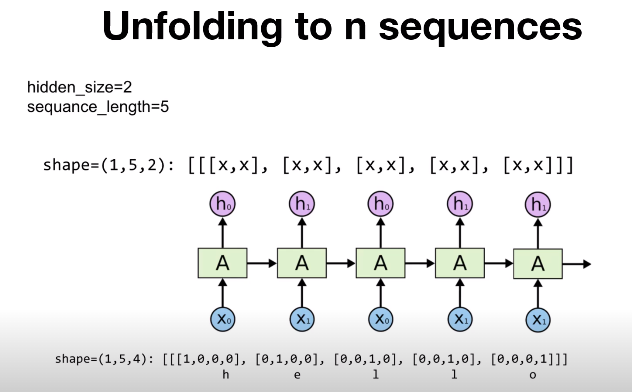

In [10]:
# One cell RNN input_dim:4 => output_dim:2, sequnce:5

# 각 알파벳에 해당하는 원핫 벡터를 기반으로 5개 시퀀스 만들고 RNN이 처리할 수 있도록 전처리
x_data = np.array([[h,e,l,l,o]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True) # layers.SimpleRNNCell + layers.RNN
outputs, states = rnn(x_data)

print('x_data: {}, shaep: {}'.format(x_data, x_data.shape))
print('outputs: {}, shaep: {}'.format(outputs, outputs.shape))

# states 변수는 outputs 변수의 마지막 hidden states와 동일한 값을 가진다.
# [-0.07221971  0.12541455]]
print('states: {}, shaep: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]]], shaep: (1, 5, 4)
outputs: [[[ 0.2832524   0.61353314]
  [-0.3222061   0.52616835]
  [ 0.03282499  0.5484138 ]
  [-0.28210306  0.43548244]
  [-0.07221971  0.12541455]]], shaep: (1, 5, 2)
states: [[-0.07221971  0.12541455]], shaep: (1, 2)


## Batching input

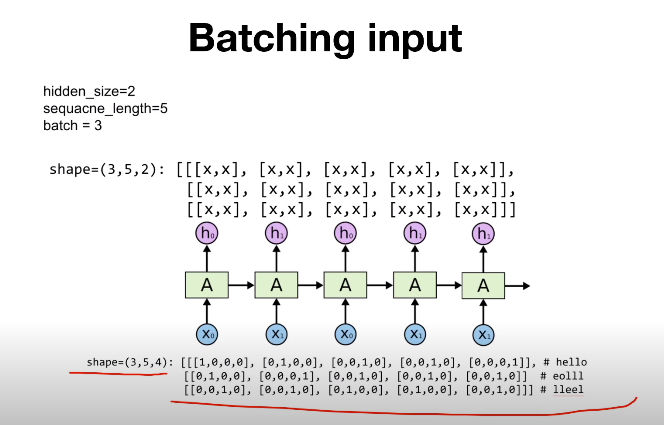

In [8]:
# One cell RNN input_dim:4 => output_dim:2, sequnce:5, batch:3

# 각 알파벳에 해당하는 원핫벡터를 기반으로 시퀀스들이 모인 mini batch 만들고 이를 RNN이 처리할 수 있도록 전처리
x_data = np.array([[h,e,l,l,o],
                   [e,o,l,l,o],
                   [l,l,e,e,l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True) # layers.SimpleRNNCell + layers.RNN
outputs, states = rnn(x_data)

print('x_data: {}, shaep: {}'.format(x_data, x_data.shape))

# outputs 변수는 미니 배치를 구성하고 있는 각각의 데이터의 전체 시퀀스에 해당하는 hidden states를 갖는다.
print('outputs: {}, shaep: {}'.format(outputs, outputs.shape))

# states 변수는 미니배치를 구성하고 있는 각각의 데이터 시퀀스의 마지막 hidden states 값을 갖는다.
print('states: {}, shaep: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 0.]]], shaep: (3, 5, 4)
outputs: [[[ 0.07883558 -0.70519197]
  [-0.18323381  0.20591013]
  [ 0.23984069  0.12637179]
  [ 0.06351174 -0.2575955 ]
  [ 0.39478147 -0.7356573 ]]

 [[ 0.47586757  0.11165762]
  [ 0.5876851  -0.8919452 ]
  [-0.7653316  -0.3369317 ]
  [-0.13776803  0.6775876 ]
  [ 0.87947065 -0.75111556]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.47586757  0.11165762]
  [ 0.46916172 -0.3597427 ]
  [-0.4332972  -0.35087466]]], shaep: (3, 5, 2)
states: [[ 0.39478147 -0.7356573 ]
 [ 0.87947065 -0.75111556]
 [-0.4332972  -0.35087466]], shaep: (3, 2)
